**Autor:** Alejandro Pastor Membrado (21C012)

Importamos las librerías necesarias:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn import neighbors, metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

Cargamos nuestro dataset, que se encuentra almacenado en un fichero excel, y lo visualizamos. Este fichero tiene 2 hojas (una primera con los datos y una segunda con la información acerca de como referenciar al autor). Sin embargo, la función read_excel de pandas lee solo la primera hoja, por lo que no tenemos que especificar nada:

In [ ]:
db = pd.read_excel('Dry_Bean_Dataset.xlsx')
db.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


Observamos que todos los datos son numéricos, siendo algunos de tipo float y otros de tipo integer, a excepción de las etiquetas que indican la clase a la que pertenece cada una de las judías, que son categóricas.

También mostraremos un resumen de sus medidas estadísticas, para observar las distintas escalas y los valores más frecuentes que suelen tomar las variables:

In [ ]:
db.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


Podemos observar que este conjunto de datos contiene información sobre 13611 judías secas y 16 variables de tipo numérico con información acerca de las judías (área, perímetro...) y una ultima variable con la etiqueta de la clase a la que pertenecen. Por tanto, se trata de un problema de clasificación, ya que nuestro objetivo es predecir la clase a la que pertenecerán otros judías a partir de los datos de los que disponemos.

A continuación, visualizamos la cantidad de judías que hay de cada una de las clases:

In [ ]:
db['Class'].value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

<Axes: >

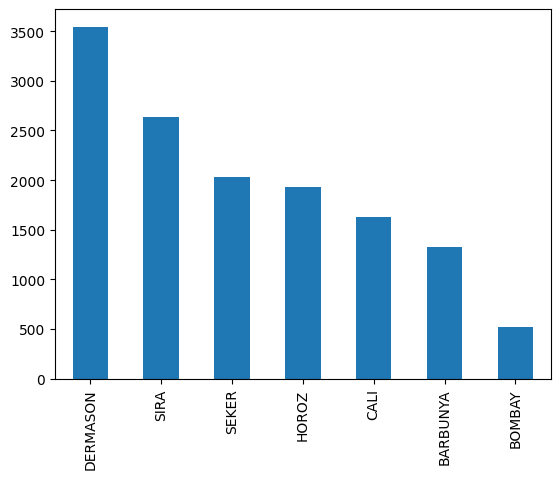

In [ ]:
db['Class'].value_counts().plot(kind='bar')

Aunque las clases se encuentran algo desbalanceadas (sobre todo DERMASON y BOMBAY), se considera que los datos se encuentran lo suficientemente repartidos como para dar por válido el parámetro accuracy para medir la precisión de los modelos.

Aunque de acuerdo a la documentación del dataset no tenemos datos nulos, lo siguiente será realizar un breve preprocesado para asegurarnos que los datos están en buenas condiciones:

#Preprocesado de los datos

Vamos a comprobar si existe alguna fila completamente vacía y que pueda ser eliminada:

In [ ]:
db.isna().all(axis=1).sum()

0

Vemos que no hay ninguna fila vacía, por lo que comprobaremos si existen datos nulos en alguna de las columnas:

In [ ]:
db.isna().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

Como suponíamos, no hay ningún valor nulo. Ahora, asignamos un valor numérico a cada una de las clases, para poder trabajar mejor con ellas. Para no perder los nombres de las clases, los almacenamos en un diccionario (con clave el número y valor el nombre):

In [ ]:
label_encoder = LabelEncoder()
clases = dict(zip(label_encoder.fit_transform(db['Class']), db['Class']))
db['Class'] = label_encoder.fit_transform(db['Class'])
print(clases)
db.head()

{5: 'SEKER', 0: 'BARBUNYA', 1: 'BOMBAY', 2: 'CALI', 4: 'HOROZ', 6: 'SIRA', 3: 'DERMASON'}


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,5
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,5
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,5
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,5
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,5


Dividimos el dataframe en conjunto x (todas las variables menos la clase) e y (etiqueta de la clase a la que pertenece):

In [ ]:
x = db.iloc[:,0:16]
y = db.iloc[:,16:]

Y dividimos en conjuntos de entrenamiento y de test (80% de los datos para entrenamiento y 20% para test):

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.20, random_state=42)

Como ytrain e ytest siguen siendo de tipo df, los convertimos a array:

In [ ]:
ytrain = ytrain.values.ravel()
ytest = ytest.values.ravel()

Finalmente, escalamos los datos de las variables. Aunque para algunas técnicas no es necesario escalarlos, para otras sí, por lo que lo realizamos en primer lugar para evitar problemas más adelante:

In [ ]:
standard_scaler = StandardScaler()
xtrain = standard_scaler.fit_transform(xtrain)
xtest = standard_scaler.transform(xtest)

#K-Nearest Neighbor

Definimos el clasificador (emplearemos distancia euclídea) y el rango de k que analizaremos posteriormente con validación cruzada para encontrar el óptimo (comprobaremos valores de k entre 1 y 50):

In [ ]:
k_range = list(range(1, 50))
param_grid = {'n_neighbors': k_range}
knn = neighbors.KNeighborsClassifier (metric='euclidean')

Empleamos validación cruzada para obtener el mejor k posible para nuestro modelo a partir de los conjuntos de datos de entrenamiento:

In [ ]:
grid_search = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid_search.fit(xtrain,ytrain)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(metric='euclidean'),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]},
             scoring='accuracy')

Obtenemos el mejor k:

In [ ]:
k = grid_search.best_params_['n_neighbors']
k

10

Una vez conocido el mejor K, 10, definimos un clasificador con ese parámetro y lo entrenamos:


In [ ]:
knn = neighbors.KNeighborsClassifier ( n_neighbors = k, metric='euclidean')
knn.fit(xtrain, ytrain)

KNeighborsClassifier(metric='euclidean', n_neighbors=10)

Aplicamos nuestro modelo al conjunto de test y analizamos los resultados:

In [ ]:
yhatTrain = knn.predict(xtrain)
print('For a K:' + str(k) + ' Train Error:' + str(np.mean(yhatTrain != ytrain)))
yhatTest = knn.predict(xtest)
print('For a K:' + str(k) + ' Test Error:' + str(np.mean(yhatTest != ytest)))

For a K:10 Train Error:0.06520940484937546
For a K:10 Test Error:0.0749173705471906


Imprimimos las matrices de confusión:

In [ ]:
print('----------------Train Confusion Matrix------------------')
print(confusion_matrix(ytrain,yhatTrain))
print(classification_report(ytrain,yhatTrain))
print('----------------Test Confusion Matrix------------------')
print(confusion_matrix(ytest,yhatTest))
print(classification_report(ytest,yhatTest))

----------------Train Confusion Matrix------------------
[[ 977    0   50    0    4    9   21]
 [   0  405    0    0    0    0    0]
 [  23    0 1261    0   17    2   10]
 [   0    0    0 2714    3   37  121]
 [   1    0   24   10 1450    0   35]
 [   3    0    0   35    1 1536   39]
 [   6    0    5  205   27   22 1835]]
              precision    recall  f1-score   support

           0       0.97      0.92      0.94      1061
           1       1.00      1.00      1.00       405
           2       0.94      0.96      0.95      1313
           3       0.92      0.94      0.93      2875
           4       0.97      0.95      0.96      1520
           5       0.96      0.95      0.95      1614
           6       0.89      0.87      0.88      2100

    accuracy                           0.93     10888
   macro avg       0.95      0.94      0.95     10888
weighted avg       0.93      0.93      0.93     10888

----------------Test Confusion Matrix------------------
[[234   0  19   0   0  

Finalmente, mostramos el accuracy en entrenamiento y test, ya que es el parámetro que usaremos para comprarlo con los modelos obtenidos con el resto de técnicas:

In [ ]:
print("Train accuracy: ",metrics.accuracy_score(ytrain, yhatTrain))
print("Test accuracy: ",metrics.accuracy_score(ytest, yhatTest))

Train accuracy:  0.9347905951506246
Test accuracy:  0.9250826294528094


#Árboles de decisión

En primer lugar, definimos dos contadores que emplearemos posteriormente para obtener el accuracy de nuestro modelo:

In [ ]:
contTrain = 0
contTest = 0

También definimos los parámetros del árbol de decisión que se comprobarán con la validación cruzada, para buscar los óptimos:


In [ ]:
param_grid = {'min_samples_leaf': [5,10],
              'min_samples_split': [5, 10, 20],
              'max_depth':[2,5,10,100],
              'criterion':['entropy','gini'],
              'ccp_alpha': [0]}

Empleamos validación cruzada para encontrar los mejores parámetros para nuestro modelo:

In [ ]:
clf = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=10, scoring='accuracy')

Y lo entrenamos usando el dataset de entrenamiento:

In [ ]:
clf.fit(xtrain , ytrain)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [0], 'criterion': ['entropy', 'gini'],
                         'max_depth': [2, 5, 10, 100],
                         'min_samples_leaf': [5, 10],
                         'min_samples_split': [5, 10, 20]})

Mostramos los mejores parámetros:

In [ ]:
print("Best estimator found by grid search:")
print(clf.best_estimator_)
model = clf.best_estimator_

Best estimator found by grid search:
DecisionTreeClassifier(ccp_alpha=0, max_depth=10, min_samples_leaf=5,
                       min_samples_split=20)


A continuación, calculamos el error que se ha producido en la validación cruzada durante el proceso de entrenamiento:

In [ ]:
scores = cross_val_score(model, xtrain, ytrain, cv=10, scoring='accuracy')
print('Validation classification Accuracies: ', + scores)
print('Mean Validation Classification Accuracy: ', + np.mean(scores))

Validation classification Accuracies:  [0.90633609 0.91368228 0.90817264 0.912764   0.90633609 0.91000918
 0.91735537 0.90909091 0.90716912 0.90716912]
Mean Validation Classification Accuracy:  0.9098084791767945


Empleamos nuestro clasificador para realizar predicciones sobre el conjunto de entrenamiento y calculamos su accuracy:

In [ ]:
yhatTrain = clf.predict(xtrain)
for i in range(0,len(ytrain),1) :
    if (yhatTrain[i] == ytrain[i]):
        contTrain = contTrain + 1
print('The train accuracy is: ' + str(contTrain/len(ytrain)))

The train accuracy is: 0.9416789125642909


Finalmente, realizamos el mismo procedimiento con el conjunto de test:

In [ ]:
yhatTest = clf.predict(xtest)
for i in range(0,len(ytest),1) :
    if (yhatTest[i] == ytest[i]):
        contTest = contTest + 1
print('The test accuracy is: ' + str(contTest/len(ytest)))

The test accuracy is: 0.9111274329783328


Ahora, imprimimos las matrices de confusión:

In [ ]:
print('----------------Train Confusion Matrix------------------')
print(confusion_matrix(ytrain,yhatTrain))
print(classification_report(ytrain,yhatTrain))
print('----------------Test Confusion Matrix------------------')
print(confusion_matrix(ytest,yhatTest))
print(classification_report(ytest,yhatTest))

----------------Train Confusion Matrix------------------
[[ 973    1   51    0    8    8   20]
 [   0  405    0    0    0    0    0]
 [  30    0 1257    0   18    2    6]
 [   0    0    0 2736    4   23  112]
 [   5    0   29   12 1451    0   23]
 [   6    0    1   30    0 1543   34]
 [   3    0   14  144   32   19 1888]]
              precision    recall  f1-score   support

           0       0.96      0.92      0.94      1061
           1       1.00      1.00      1.00       405
           2       0.93      0.96      0.94      1313
           3       0.94      0.95      0.94      2875
           4       0.96      0.95      0.96      1520
           5       0.97      0.96      0.96      1614
           6       0.91      0.90      0.90      2100

    accuracy                           0.94     10888
   macro avg       0.95      0.95      0.95     10888
weighted avg       0.94      0.94      0.94     10888

----------------Test Confusion Matrix------------------
[[225   0  23   0   2  

Para poder interpretar las reglas generadas por el árbol de decisión, lo mostramos mediante la función plot_tree():

Profundidad del árbol: 10
Número de nodos terminales: 182


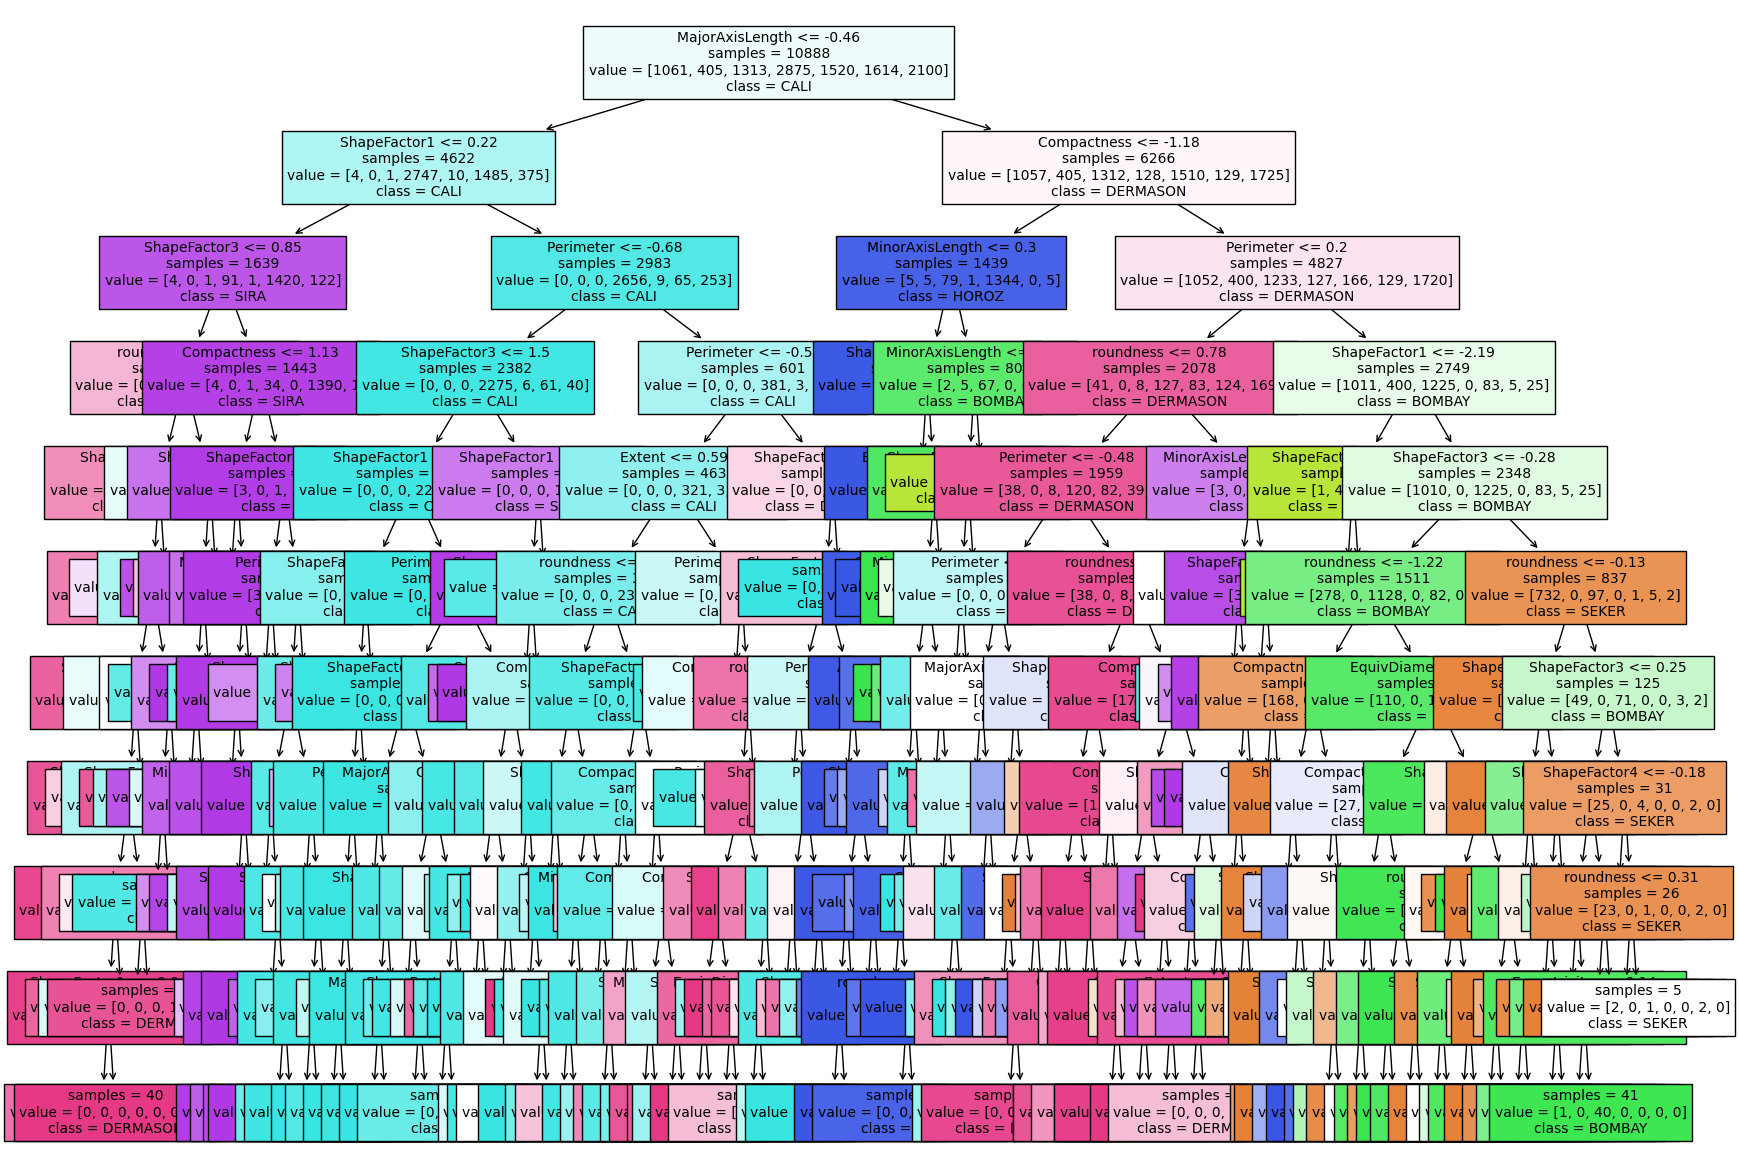

In [ ]:
fig, ax = plt.subplots(figsize=(20, 15))
print(f"Profundidad del árbol: {model.get_depth()}")
print(f"Número de nodos terminales: {model.get_n_leaves()}")

plot = plot_tree(
            decision_tree = model,
            feature_names = list(db.columns[:-1]),
            class_names   = list(clases.values()),
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )

Como son demasiadas reglas y el gráfico no se visualiza bien, mostramos las reglas en forma de texto:

In [ ]:
texto_modelo = export_text(
                    decision_tree = model,
                    feature_names = list(db.columns[:-1])
               )
print(texto_modelo)

|--- MajorAxisLength <= -0.46
|   |--- ShapeFactor1 <= 0.22
|   |   |--- ShapeFactor3 <= 0.85
|   |   |   |--- roundness <= 0.89
|   |   |   |   |--- ShapeFactor3 <= 0.75
|   |   |   |   |   |--- Solidity <= 0.60
|   |   |   |   |   |   |--- ShapeFactor1 <= 0.20
|   |   |   |   |   |   |   |--- ShapeFactor4 <= 0.58
|   |   |   |   |   |   |   |   |--- roundness <= 0.69
|   |   |   |   |   |   |   |   |   |--- ShapeFactor1 <= 0.04
|   |   |   |   |   |   |   |   |   |   |--- class: 6
|   |   |   |   |   |   |   |   |   |--- ShapeFactor1 >  0.04
|   |   |   |   |   |   |   |   |   |   |--- class: 6
|   |   |   |   |   |   |   |   |--- roundness >  0.69
|   |   |   |   |   |   |   |   |   |--- class: 6
|   |   |   |   |   |   |   |--- ShapeFactor4 >  0.58
|   |   |   |   |   |   |   |   |--- roundness <= 0.52
|   |   |   |   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |   |   |   |--- roundness >  0.52
|   |   |   |   |   |   |   |   |   |--- class: 6
|   |   |   |   |   |   |--

#Regresión logística

En primer lugar, definimos los parámetros del espacio de búsqueda que emplearemos en la validación cruzada (no buscamos entre los distintos solver porque provoca que la ejecución tarde demasiado tiempo):

In [ ]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'penalty': ['l1', 'l2']}
              #'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']}

Empleamos validación cruzada para obtener los mejores parámetros para nuestro modelo:

In [ ]:
clf = GridSearchCV(LogisticRegression(), param_grid, cv=10)

Y lo entrenamos usando el dataset de entrenamiento:

In [ ]:
clf.fit(xtrain , ytrain)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']})

Mostramos los mejores parámetros:

In [ ]:
print("Best estimator found by grid search:")
print(clf.best_estimator_)
model = clf.best_estimator_

Best estimator found by grid search:
LogisticRegression(C=100)


A continuación, calculamos el error que se ha producido en la validación cruzada durante el proceso de entrenamiento:

In [ ]:
scores = cross_val_score(model, xtrain, ytrain, cv=10, scoring='accuracy')
print('Validation classification Accuracies: ', + scores)
print('Mean Validation Classification Accuracy: ', + np.mean(scores))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Validation classification Accuracies:  [0.91460055 0.92745638 0.92378329 0.93296602 0.91551882 0.92745638
 0.92745638 0.92561983 0.91911765 0.93106618]
Mean Validation Classification Accuracy:  0.9245041491114353


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Definimos dos contadores para poder calcular el accuracy:

In [ ]:
contTrain = 0
contTest = 0

Realizamos predicciones sobre el conjunto de entrenamiento y calculamos su accuracy:

In [ ]:
yhatTrain = clf.predict(xtrain)
for i in range(0,len(ytrain),1) :
    if (yhatTrain[i] == ytrain[i]):
        contTrain = contTrain + 1
print('The train accuracy is: ' + str(contTrain/len(ytrain)))

The train accuracy is: 0.9243203526818515


Y lo mismo para el conjunto de test:

In [ ]:
yhatTest = clf.predict(xtest)
for i in range(0,len(ytest),1) :
    if (yhatTest[i] == ytest[i]):
        contTest = contTest + 1
print('The test accuracy is: ' + str(contTest/len(ytest)))

The test accuracy is: 0.9265515975027543


Ahora, imprimimos las matrices de confusión:

In [ ]:
print('----------------Train Confusion Matrix------------------')
print(confusion_matrix(ytrain,yhatTrain))
print(classification_report(ytrain,yhatTrain))
print('----------------Test Confusion Matrix------------------')
print(confusion_matrix(ytest,yhatTest))
print(classification_report(ytest,yhatTest))

----------------Train Confusion Matrix------------------
[[ 963    0   59    0    4    8   27]
 [   0  405    0    0    0    0    0]
 [  36    0 1238    0   22    3   14]
 [   1    0    0 2645    5   40  184]
 [   2    0   25   14 1440    0   39]
 [  13    0    1   23    1 1527   49]
 [   3    0    9  184   31   27 1846]]
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      1061
           1       1.00      1.00      1.00       405
           2       0.93      0.94      0.94      1313
           3       0.92      0.92      0.92      2875
           4       0.96      0.95      0.95      1520
           5       0.95      0.95      0.95      1614
           6       0.86      0.88      0.87      2100

    accuracy                           0.92     10888
   macro avg       0.94      0.93      0.94     10888
weighted avg       0.92      0.92      0.92     10888

----------------Test Confusion Matrix------------------
[[238   0  14   0   0  

#SVMs

En primer lugar, definimos los parámetros del espacio de búsqueda que emplearemos en la validación cruzada:

In [ ]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'kernel': ['linear', 'rbf', 'poly'],
              'gamma': ['scale', 'auto']}

Empleamos validación cruzada para encontrar los mejores parámetros para nuestro modelo:

In [ ]:
clf = GridSearchCV(SVC(), param_grid, cv=10)

Entrenamos el clasificador usando el dataset de entrenamiento (tarda alrededor de 10min):

In [ ]:
clf.fit(xtrain , ytrain)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

Mostramos los mejores parámetros:

In [ ]:
print("Best estimator found by grid search:")
print(clf.best_estimator_)
model = clf.best_estimator_

Best estimator found by grid search:
SVC(C=100)


A continuación, calculamos el error que se ha producido en la validación cruzada durante el proceso de entrenamiento:

In [ ]:
scores = cross_val_score(model, xtrain, ytrain, cv=10, scoring='accuracy')
print('Validation classification Accuracies: ', + scores)
print('Mean Validation Classification Accuracy: ', + np.mean(scores))

Validation classification Accuracies:  [0.92470156 0.93663912 0.92745638 0.93663912 0.92102847 0.93112948
 0.94123049 0.92561983 0.92830882 0.93474265]
Mean Validation Classification Accuracy:  0.930749591503268


Definimos dos contadores para poder calcular el accuracy de nuestro modelo:

In [ ]:
contTrain = 0
contTest = 0

Realizamos predicciones sobre el conjunto de entrenamiento y calculamos su accuracy:

In [ ]:
yhatTrain = clf.predict(xtrain)
for i in range(0,len(ytrain),1) :
    if (yhatTrain[i] == ytrain[i]):
        contTrain = contTrain + 1
print('The train accuracy is: ' + str(contTrain/len(ytrain)))

The train accuracy is: 0.9439750183688465


Misma operación para el conjunto de test:

In [ ]:
yhatTest = clf.predict(xtest)
for i in range(0,len(ytest),1) :
    if (yhatTest[i] == ytest[i]):
        contTest = contTest + 1
print('The test accuracy is: ' + str(contTest/len(ytest)))

The test accuracy is: 0.9291222915901579


Finalmente, mostramos las matrices de confusión:

In [ ]:
print('----------------Train Confusion Matrix------------------')
print(confusion_matrix(ytrain,yhatTrain))
print(classification_report(ytrain,yhatTrain))
print('----------------Test Confusion Matrix------------------')
print(confusion_matrix(ytest,yhatTest))
print(classification_report(ytest,yhatTest))

----------------Train Confusion Matrix------------------
[[1010    0   29    0    3    6   13]
 [   0  405    0    0    0    0    0]
 [  20    0 1272    0   11    3    7]
 [   0    0    0 2729    2   26  118]
 [   1    0   17   12 1460    0   30]
 [   2    0    0   33    0 1550   29]
 [   6    0    1  206   15   20 1852]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1061
           1       1.00      1.00      1.00       405
           2       0.96      0.97      0.97      1313
           3       0.92      0.95      0.93      2875
           4       0.98      0.96      0.97      1520
           5       0.97      0.96      0.96      1614
           6       0.90      0.88      0.89      2100

    accuracy                           0.94     10888
   macro avg       0.96      0.95      0.96     10888
weighted avg       0.94      0.94      0.94     10888

----------------Test Confusion Matrix------------------
[[240   0  12   0   0  